In [11]:
import torch
from PIL import Image

from lavis.models import load_model_and_preprocess

#### Load an example image

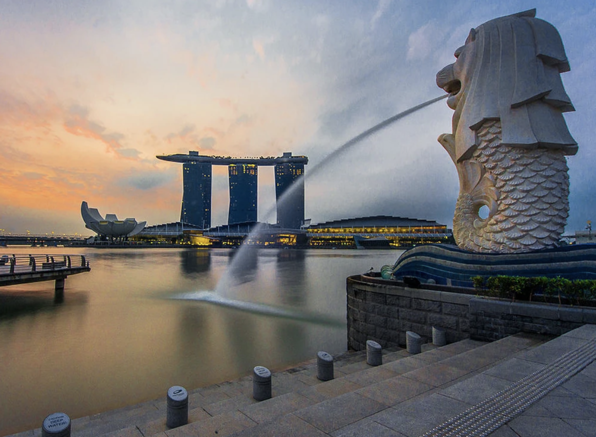

In [12]:
raw_image = Image.open("../docs/_static/merlion.png").convert("RGB")
display(raw_image.resize((596, 437)))

In [13]:
# setup device to use
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#### Load CLIP feature extractor

In [14]:
# model, vis_processors, txt_processors = load_model_and_preprocess("clip_feature_extractor", model_type="ViT-B-32", is_eval=True, device=device)
model, vis_processors, txt_processors = load_model_and_preprocess("clip_feature_extractor", model_type="ViT-B-16", is_eval=True, device=device)

#### Specify class names

In [15]:
cls_names = ["merlion", "sky", "giraffe", "fountain", "marina bay"]
# Optional to use prompts to guide the model
cls_names = [txt_processors["eval"](cls_nm) for cls_nm in cls_names]

In [16]:
cls_names

['merlion', 'sky', 'giraffe', 'fountain', 'marina bay']

In [23]:
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)

#### Extract image embedding and class name embeddings

In [24]:
sample = {"image": image, "text_input": cls_names}

clip_features = model.extract_features(sample)

image_features = clip_features.image_embeds_proj
text_features = clip_features.text_embeds_proj

#### Matching image embeddings with each class name embeddings

In [25]:
sims = (image_features @ text_features.t())[0] / 0.01
probs = torch.nn.Softmax(dim=0)(sims).tolist()

for cls_nm, prob in zip(cls_names, probs):
    print(f"{cls_nm}: \t {prob:.3%}")

merlion: 	 40.767%
sky: 	 0.004%
giraffe: 	 0.001%
fountain: 	 0.140%
marina bay: 	 59.088%
